# GG4257 - Urban Analytics: A Toolkit for Sustainable Urban Development
## Lab Workbook No 2: Data Manipulation and Working with Web Services
---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - Iteration 2024

# Objectives

- Practice and get familiar with the urban data landscape
- Understand the *messiness* of real world (urban) data
- Create common objects used to store data
- Read tabular and spatial data formats into Python
- Subset and merge data
- Manipulate data and calculate new values
- Practice basic techiques of Data Manipulation and learn how to use Python to access programmatically urban data and understand the benefits of it


# Data Manipulation

Access and manipulate data is very important when it comes to work with python or any kind of programming langague, you need to feel confortable by reading and manipulating data in this programatic way. Initially it will seems it is more complicated, but later with practice you will see the advangte of dealing with data in this way. 


## Arrays and Data Frames (Numpy and Pandas)

As you recall from the previous modules ( GG3209), there are two packages that can help you to read data in your computer memory and then let you manipulate them in a more efficient way. 

Two main object types that can be used to store tabular data in Python include the data frame and array. Each column of a data frame must be a single type, but different columns can be different types (e.g. string, float, etc.); all the columns of an array must be the same type. You can create these within Python manually or by reading in other common formats such as spreadsheets or csv files.


In [ ]:
import numpy as np
import pandas as pd

#Create two arrays
years = range(2010, 2018) #creates a list of consecutive integers from 2010 to 2017
a = np.repeat(years, 4) #this uses numpy's repeat() function to repeat values
b = np.random.randint(0, 40, 32) # the randint() function can be used to generate random integers - in this case 32 values between 0 and 40
#Create data frame
c = pd.DataFrame({'a':a,'b':b})  #the curly brackets indicate a dictionary

The last line says to make a two column data frame, where the first column is called `'a'` and has the values from the `a` array, and the second column is called `'b'` and contains the values from the `b` array.

You can type `c` into the console to return the whole data frame, however, you might just want to look at the top few rows. This can be achieved with the `head()` method:

In [ ]:
#head returns the top five rows
c.head()

In a similar way you can create arrays using the numpy package.

In [ ]:
#Create a list of numbers
a = range(0, 25) #the range function generates a range of integers

b = np.array(a) #creates a one dimensional array
b = b.reshape(5,5) #create an array with 5 rows and 5 columns
b

It is possible to multiply a numeric array by a constant or another array

In [ ]:
#Multiply b by 10
b * 10

In [ ]:
#Multiply b * b
b * b 

Extracting elements from a one dimensional array is the same as a list; for a two dimensional array the slicing is formatted as [row number, column number]. For example:

In [ ]:
#Extract the 0 position row
b[0,:]  #the colon means give all elements along that dimension

#Extract 3 position column
b[:,3]

#Extract the 2 and 3 position columns
b[:,2:4] # The colon is used to define a numeric vector between the two numbers

#Extract 0 and 3 position rows
b[[0,3],:] # The list ([0,3]) is used to identify the indexes to be extracted

#Extract the value in the 2 position row and 3 position column
b[2,3]

# If you run this cell you will get the output only from the last part of the script,
# if you want to see the outcome of every part, just copy and paste the code in another code cell

In [ ]:
b[:,2:4]

In [ ]:
b[[0,3],:]

In the data frame that you created earlier, you can use a similar notation to extract values based on the row and column indexes. It is formatted as `.iloc[row index, column index]`.

As you see in the previous practices, `iloc` and `loc` are key methods to explore, filter and manipulate data uisng pandas. So make sure you understand how that work. 

In [ ]:
c.iloc[23,1]

Data frames can have named rows and columns, which can be used for indexing. It is formatted as `loc[row name, column name]`

In [ ]:
c.loc[23,'b']

You can also reference the column names themselves using dot notation, for example:

In [ ]:
#Return all the values in the column called "a"
c.a

In [ ]:
#A different way of returning the column called "a"
c["a"]

In [ ]:
#Yet another way of returning the column called "a"
c.loc[:,"a"]

We can also find out what a data frame's column names are using the `columns` attribute:

In [ ]:
c.columns

There are many ways you can rename the columns, here one of those:

In [ ]:
c = c.rename(columns={'a': 'Year', 'b': 'Count'})
c.head()

# Challenge No 1:

1. Using a Dictionary, create a dataframe (table), with at least 4 columns and more than 100 rows. How come you can create this among data from scratch without defining every single row of data? 
2. Using the appropriate method, create a new DataFrame containing only the first 30 rows and the first 3 columns of the original DataFrame. Name this new DataFrame subset_df.
3. Using the appropriate method, filter the rows from the original dataframe where a numerical attribute(column) is greater than a particular numerical value, and find another categorical attribute that is equal to a specific string or text. Name this new DataFrame filtered_df.
4. Check this website https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html and apply the methods, mean, standard deviation, group_by to run fundamental statistical analysis of your created data frame.
5. Make sure you comment on your code and describe how you are manipulating the data.


### 1. Using a Dictionary, create a dataframe (table), with at least 4 columns and more than 100 rows. How come you can create this among data from scratch without defining every single row of data?

In [ ]:
#From the pandas documentation, I can use random.randint() to make random integers and specify for 100 rows. 
age = range(0, 100) #creating a list of consecutive ages from 13 to 65
region = ["North", "South", "East", "West"] #Creating regions
a = np.repeat(region, 25) #this uses numpy's repeat() function to repeat values - I've repeated by 25 so that the array is the same length
chips = np.random.randint(0, 50, 100)
cookies = np.random.randint(0, 67, 100) 
apples = np.random.randint(0, 6, 100) 
candy = np.random.randint(0, 20, 100) 
# Creating the df
sweets = pd.DataFrame({'age':age,'region':a, 'cookies':cookies, 'chips':chips, 'apples':apples, 'candy':candy})
sweets

### 2. Using the appropriate method, create a new DataFrame containing only the first 30 rows and the first 3 columns of the original DataFrame. Name this new DataFrame subset_df.

In [ ]:
#Using 'iloc' to display the values in the first 30 rows and first three columns of sweets
subset_sweets = sweets.iloc[:30, :3]
print(subset_sweets) 

### 3. Using the appropriate method, filter the rows from the original dataframe where a numerical attribute(column) is greater than a particular numerical value, and find another categorical attribute that is equal to a specific string or text. Name this new DataFrame filtered_df.

In [ ]:
# I can use .loc to filter rows. I can also use == to specify a specific string rather than a value. 
filtered_sweets = sweets.loc[(sweets["cookies"] > 50) & (sweets["region"] == "North")]

print (filtered_sweets) 


### 4. Check this website https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html and apply the methods, mean, standard deviation, group_by to run fundamental statistical analysis of your created data frame.

In [ ]:
# I can use .mean. However, because I have specified the region, I needed to add numeric_only. 
sweets.mean(numeric_only=True)

In [ ]:
# Standard Dev
sweets.std(numeric_only=True)

In [ ]:
# Note to come back to this 
sweets.groupby('cookies')

## Reading External Data

For most urban analytics you are more likely to be reading external data into Python rather than creating data objects from scratch. Tabular data is commonly stored in text files such as CSV, or on spreadsheets; and explicitly spatial data will likely be stored in formats such as Shapefiles.

A common way in which data can be stored externally are the use of `.csv` files. These are text files, and have a very simple format where columns of attributes are separated by a comma, and each row by a carriage return.

**Note:** There are a range of different delimiters which can be used in addition to a comma, with the most common being tab; although sometimes characters not commonly used such as bar/pipe (`|`) will be used.

In the following example you will read in some U.S. Census Bureau, 2010-2014 American Community Survey (ACS) 5-Year Estimate data. This was downloaded from the [American Fact Finder](https://factfinder.census.gov) website. The data are for census tracts in San Francisco and relate to median earnings in the past 12 months.

Reading CSV files into Python uses pandas `read_csv` function: 

In [ ]:
import os
os.getcwd()

In [ ]:
os.chdir("/Users/Isaiah/Documents/UA_Repo/Labs/Lab_2")

In [ ]:
#Read CSV file - creates a data frame called earnings
earnings = pd.read_csv("data/ACS_14_5YR_S2001_with_ann.csv")
#Show column headings

earnings.columns

#UID - Tract ID
#pop - estimated total population over 16 with income
#pop_m - estimated total population over 16 with income (margin of error)
#earnings - estimated median earnings
#earnings_m - estimated median earnings (margin of error)

It is possible to show the structure of the object using the `info()` method.

In [ ]:
earnings.info()

This shows that the object is a Pandas data frame with 197 rows and 5 variables. For each of the attributes the class is shown (e.g. `int64` indicates integer). The `read_csv()` function guesses the column types when the data are read into Python.

One issue you might notice is that the earnings and earnings_m variables have been read in as an `object`. The reason these columns were not read as integers (like the UID, pop, pop_m) is the presence of two non-numeric values which are shown as "*" and "-". In ACS data these two symbols indicate that the sample sizes were either no sample observations or too few sample observations to make a calculation.

Issues such as these are quite common when reading in external data; and we will look at how this can be corrected later.



**However!**: Not all tabular data are distributed as textfiles, and another very common format is Microsoft Excel format - .xls or xlsx.

The following code downloads an Excel File from the [London Data Store](https://data.london.gov.uk/) and then reads this into Python.

>Note: In the following code you will fetch data from a URL, something that is new at this point, I will describe better the importance of working with web services later in the next seccion of this workbook.


In [ ]:
import urllib.request
url = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xlsx"
urllib.request.urlretrieve(url, "data/UK_House_price_index.xlsx")

In [ ]:
#Read workbook
house_price = pd.read_excel("data/UK_House_price_index.xlsx", sheet_name='Average price')
house_price

## Reading Spatial Data

Spatial data are distributed in a variety of formats, but Shapefiles. are maybe the most common format. These can be read into Python using a number of packages, however, is illustrated here with "geopandas". You have experienced GeoPandas already in the previous module, but here you can practice once again.

The following code loads the house composition from the latest Census in the UK downloaded from the [NOMIS Data](https://www.nomisweb.co.uk/datasets/c2021ts003).

In [ ]:
# Loading house data 
import pandas as pd
house_data = pd.read_excel("data/householdcomposition.xlsx")
pd.options.display.max_columns = None
house_data.head()

In [ ]:
house_data.columns

In [ ]:
house_data.info()

You have notice by using the `.info()` and .columns methods that our dataset have some issues than need to resolve before we movee fowards. The initial issue is the name of the columns, and the `Dytpe`
of the columns, instead of having a string and numerical or float/intenger values, we have object, which tells us that there is something on those columns that might need to get removed. 

In [ ]:
#Let's start by renaming some of the most important columns names.
house_data.rename(columns={'2021 super output area - middle layer':'2021_MSOA_name','Unnamed: 1': 'MSOA21CD', 'Total: All households': 'All_households', 'One-person household':'1Person_household'}, inplace=True)
house_data.head()

In [ ]:
# Making the data into a string with str
house_data['2021_MSOA_name'] = house_data['2021_MSOA_name'].astype(str)
house_data['MSOA21CD'] = house_data['MSOA21CD'].astype(str)

In [ ]:
house_data.info()

Here we are loading a shapefile from the latest version of census boundaries included in the The Open Geography portal from the Office for National Statistics (ONS) https://geoportal.statistics.gov.uk/ 

In [ ]:
#Loading geopandas
import geopandas as gpd

# Read Shapefile
shapefile_path = "data/MSOA_2021_BGC/MSOA_2021_EW_BGC_V2.shp"
gdf_shapefile = gpd.read_file(shapefile_path)

In [ ]:
gdf_shapefile.head()

In [ ]:
# Getting the coordinate system with crs
gdf_shapefile.crs

In [ ]:
#gdf_shapefile.explore()

In [ ]:
# use to_crs to change the coordinate reference system 
gdf_wgs84 = gdf_shapefile.to_crs(epsg=4326)

In [ ]:
gdf_wgs84.crs

In [ ]:
gdf_wgs84.dtypes

Now, we can also create a Dictionary to define which columns we would like to keep in a more curated dataframe

In [ ]:
# Defining the columns we want with a dictionary once we define the geodataframe under a new crs (WGS84) 
keep_cols = [
    "MSOA21CD",
    "MSOA21NM",
    "geometry",
]
msoa_shp = gdf_wgs84[keep_cols]
msoa_shp.head()

In [ ]:
#msoa_shp.explore()

In [ ]:
merged_gdf = msoa_shp.merge(house_data, on='MSOA21CD')

In [ ]:
merged_gdf.info()

In [ ]:
merged_gdf.head()

In [ ]:
#This is a "magic", which allows figures to be rendered inside the notebook (it only needs to be run once in Notebook)
%matplotlib inline

merged_gdf.explore(column='All_households', cmap='Blues')

As you already know, a geo data frame is structured like a regular data frame, with rows being observations and columns being attributes on those observations. The key difference is that a geo data frame has a `geometry` column that contains the spatial coordinates on each record. You can access the `geometry` like you would any column:

In [ ]:
#Show the top rows of the geometry column
merged_gdf.geometry.head()

In [ ]:
### Run the following line only the first time running this notebook.

#pip install leafmap 

Leafmap is a popular new Python package for interactive mapping and geospatial analysis with minimal coding in a Jupyter environment.  Get more information in its documentation web site: https://leafmap.org/

In [ ]:
import leafmap

m = leafmap.Map()
m

In [ ]:
# You can use this handy web map to get the centre of the map, zoom level, and other great resources for web map development 
m = leafmap.Map(center=[54, -1], zoom=6)
m.add_gdf(merged_gdf, layer_name="Housing")
m

## Creating Spatial Data

Sometimes it is necessary to create a spatial object from scratch, which is most common for point data given that only a single co-ordinate is required for each feature. This can be achieved by building a `GeoDataFrame()` object and is used within this example to create a 311 point dataset. 311 data record non emergency calls within the US, and in this case are those which occurred within San Francisco between January and December 2016. The 311 data used here have been simplified from the [original](https://data.sfgov.org/City-Infrastructure/Case-Data-from-San-Francisco-311-SF311-/vw6y-z8j6/data) data to only a few variables, and those calls without spatial references have been removed.

In [53]:
# Read csv into Python
data_311 = pd.read_csv("data/311.csv")
# Have a look at the structure
data_311.head()

,CaseID,Category,Lat,Lon
0,6405492,Street Defects,37.822688,-122.363150
1,6590944,Sewer Issues,37.810543,-122.363370
2,5646247,Abandoned Vehicle,37.728618,-122.364671
3,5547584,Graffiti Public Property,37.725278,-122.365803
4,6407484,Street and Sidewalk Cleaning,37.725411,-122.365850


Each spatial object in a geo data frame must be an point, line or polygon. GeoPandas uses spatial object types from the shapely package. In this example we use the `Point` type.

In [54]:
from shapely.geometry import Point 

In [55]:
# Create a geo data frame
 # import just the Point class from the shapely package
geom = [Point(xy) for xy in zip(data_311.Lon, data_311.Lat)] #create a list of latitude, longitude pairs
SP_311 = gpd.GeoDataFrame(data_311, crs=merged_gdf.crs, geometry=geom)

<Axes: >

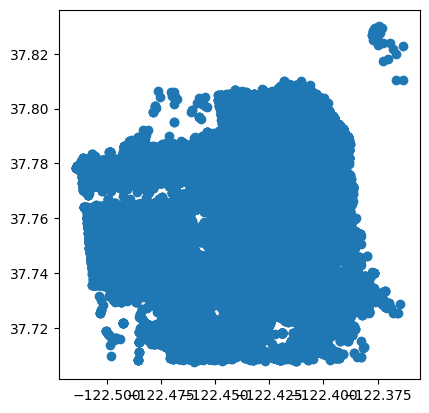

In [56]:
# Show the results
SP_311.plot()

## Subsetting Data

It is often necessary to subset data; either restricting a data frame to a set of columns or rows; or in the case of spatial data, creating an extract for a particular set of geographic features. Subsetting can occur in a number of different ways

In [57]:
#Get the frequencies by the categories used within the 311 data
data_311.Category.value_counts()

Category
Street and Sidewalk Cleaning    41683
Graffiti Public Property         9500
Graffiti Private Property        7436
General Requests                 5976
Abandoned Vehicle                5655
Sewer Issues                     2432
Streetlights                     2155
Street Defects                   2146
Damaged Property                 1966
MUNI Feedback                    1928
Sidewalk or Curb                 1822
Tree Maintenance                 1764
Litter Receptacles               1552
Rec and Park Requests            1304
Sign Repair                      1219
Illegal Postings                 1137
Temporary Sign Request           1045
Blocked Street or SideWalk        941
SFHA Requests                     693
Noise Report                      626
Residential Building Request      295
311 External Request              179
Catch Basin Maintenance           161
Color Curb                        146
Interdepartmental Request          90
DPW Volunteer Programs              7
Unp

In [ ]:
# Use the loc method to extract rows from the data which relate to Sewer Issues
sewer_issues = data_311.loc[data_311.Category=="Sewer Issues", :]

# Use the square brackets "[]" to perform the same task
sewer_issues = data_311[data_311.Category=="Sewer Issues"]
sewer_issues.head()  #check out the first rows

In [ ]:
# Extract the IDs for the "Sewer Issues"
sewer_issues_IDs = data_311.loc[data_311.Category=="Sewer Issues", "CaseID"]
sewer_issues_IDs.head()  #check out the first elements

Subsetting can also be useful for spatial data. In the example below we can list all the regions in England, and using simple queries we can remove, overwrite, and plot only certain rows inside our initial spatial data frame. For example consider you need to remove an area from your original dataset, and you you the code or value to use for the querie, so you can use something like:

In [ ]:
regions_england = gpd.read_file("data/Regions_(December_2021)/RGN_DEC_2021_EN_BGC.shp")

In [ ]:
regions_england.explore('RGN21NM')

In [ ]:
regions_name = regions_england['RGN21NM'].value_counts()
regions_name

In [ ]:
regions_england[regions_england.RGN21NM != "South East"].plot() # Removes South East from the plot

In [ ]:
regions_england[regions_england.RGN21NM == "North East"].plot() # Only plots North East

In [ ]:
regions_england = regions_england[regions_england.RGN21NM != "London"] # Overwrites the regions_england object
regions_england.plot()

## Clipping Spatial Data

Clipping is a process of subsetting using overlapping spatial data. The following code uses the outline of the coast of the U.S. to clip the boundaries of the Census Track Shapefile, another geodata frame object. Note: it is a little slow.

The Census Tracts Shapefile was downloaded from the [SF OpenData](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Census-2010-Tracts-for-San-Francisco/rarb-5ahf/data).

> Note: You will find an error; you should be able to fix it at this level.

In [ ]:
#Read in coastal outline (Source from - https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html)
coast = gpd.read_file("data/Census Tracts USA/cb_2015_us_county_500k.shp")
SF = gpd.read_file("data/Census Tracts USA/tl_2010_06075_tract10.shp")

coast_single = coast.unary_union  #merges the US counties into a single object
SF_clipped_geoms = SF.intersection(coast_single) # Clip the SF spatial data frame object to the coastline - just returns geometries
SF_clipped = SF.copy() #make a copy of the SF dataframe
SF_clipped['geometry'] = SF_clipped_geoms #replace the old geometries with the clipped geometries
SF_clipped = SF_clipped[SF_clipped.intersects(SF_clipped_geoms.unary_union)] #subset to just the observations in the clipped area

#Plot the results
SF_clipped.plot()

In [ ]:
SF_single = SF_clipped.unary_union  #merges SF tracts into a single object
SP_311_PIP = SP_311[SP_311.intersects(SF_single)] # Select the 331 points data that intersect with San Francisco
SP_311_PIP.plot()

In [ ]:
SP_311_PIP.head()

## Merging Tabular Data

So far you have utilized a single data frame or spatial object; however, it is often the case that in order to generate information, data from multiple sources are required. Where data share a common "key", these can be used to combine / link tables together. This might for example be an identifier for a zone; and is one of the reasons why most statistical agencies adopt a standard set of geographic codes to identify areas.

In the earlier imported data "earnings" this included a UID column which relates to a Tract ID. We can now import an additional data table called bachelors - this also includes the same ID.

In [ ]:
#Read CSV file - creates a data frame called earnings
bachelors = pd.read_csv("data/ACS_14_5YR_S1501_with_ann.csv")
bachelors.head()

#UID - Tract ID
#Bachelor_Higher - Bachelor degree or higher %
#Bachelor_Higher_m - Bachelor degree or higher % (margin of error)

Using the matching ID columns on both datasets we can link them together to create a new object with the `merge()` function in pandas:

In [ ]:
#Perform the merge
SF_Tract_ACS = pd.merge(earnings, bachelors, left_on="UID", right_on="UID")
SF_Tract_ACS = pd.merge(earnings, bachelors, on="UID") # An alternative method to the above, but a shortened version as the ID columns are the same on both data frames
#there are many more options - for more details type help(pd.merge)

#The combined data frame now looks like
SF_Tract_ACS.head() # shows the top of the data frame

In [ ]:
help(pd.merge)

## Removing and Creating Attributes

It is sometimes necessary to remove variables from a tabular object or to create new values. In the following example we will remove some unwanted columns in the SF_clipped object, leaving just the zone id for each polygon.

In [ ]:
#Remind yourself what the data look like...
SF_clipped.head()

In [ ]:
SF_clipped = SF_clipped[["GEOID10", "geometry"]] #Makes a new version of the geo data frame with just the values of the GEOID10 and geometry columns

#The data frame within the data slot now looks as follows
SF_clipped.head()

These tract ID are supposed to match with those in the "SF_Tract_ACS" object, however, if you are very observant you will notice that there is one issue; the above have a leading zero.

In [ ]:
SF_Tract_ACS.head() # show the top of the SF_Tract_ACS object

As such, in this instance we will create a new column on the SF_Tract_ACS data frame with a new ID that will match the SF GEOID10 column. We can achieve this using the square brackets (`[]`) notation and will call this new variable "GEOID10".

In [ ]:
# Creates a new variable with a leading zero
SF_Tract_ACS['GEOID10'] = "0" + SF_Tract_ACS.UID.astype(str) #need to convert the UID column to strings before prepending the zero
SF_Tract_ACS.head()

If you remember from earlier in this practical, the earnings data had some values that were stored as "objects" rather than floats or integers, and the same is true for both the bachelors data; and now the combined `SF_Tract_ACS` object. We can check this again as follows:

In [ ]:
SF_Tract_ACS.info()

We can also remove the UID column. A quick way of doing this for a single variable is to use the `drop()` method:

In [ ]:
SF_Tract_ACS = SF_Tract_ACS.drop('UID', axis=1)  #axis=1 indicates to drop a column (axis=0 is for rows)

We will now convert the object variables to numbers. The first stage will be to remove the "-" and "**" characters from the variables with the `replace` function, replacing these with NA values.

In [ ]:
#Replace the "-" and "*" characters
import numpy as np
SF_Tract_ACS.loc[SF_Tract_ACS.earnings=='-', 'earnings'] = np.nan #replace the "-" values with NA
SF_Tract_ACS.loc[SF_Tract_ACS.earnings_m=='**', 'earnings_m'] = np.nan #replace the "**" values with NA
SF_Tract_ACS.loc[SF_Tract_ACS.Bachelor_Higher=='-', 'Bachelor_Higher'] = np.nan #replace the "-" values with NA
SF_Tract_ACS.loc[SF_Tract_ACS.Bachelor_Higher_m=='**', 'Bachelor_Higher_m'] = np.nan #replace the "-" values with NA

We will now convert these to numeric values:

In [ ]:
SF_Tract_ACS.earnings = SF_Tract_ACS.earnings.astype(float)
SF_Tract_ACS.earnings_m = SF_Tract_ACS.earnings_m.astype(float)
SF_Tract_ACS.Bachelor_Higher = SF_Tract_ACS.Bachelor_Higher.astype(float)
SF_Tract_ACS.Bachelor_Higher_m = SF_Tract_ACS.Bachelor_Higher_m.astype(float)

In [ ]:
SF_Tract_ACS.info()

Now all the variables other than the "GEOID10" are stored as integers or floats:

## Merging Spatial Data

It is also possible to join tabular data onto a spatial object (e.g. a geo data frame) in the same way as with regular data frames. In this example, we will join the newly created `SF_Tract_ACS` data onto the `SF_clipped` data frame.

In [ ]:
SF_clipped = pd.merge(SF_clipped, SF_Tract_ACS, on="GEOID10") # merge
SF_clipped.head() #show the attribute data

## Spatial Joins

Earlier in this practical we created a geo data frame which we later cropped using the `intersects()` method to create the `SP_311_PIP` object. As a reminder of what this looks like it is plotted below:

In [ ]:
SP_311_PIP.explore(tiles="CartoDB positron")

We will now clean up the associated data frame by removing all of the attributes apart from the category and geometry.

In [ ]:
SP_311_PIP = SP_311_PIP[["Category", "geometry"]] #subset data
SP_311_PIP.head()

The `intersects()` method was used to clip a dataset to an extent earlier, essentially a [point in polygon](https://en.wikipedia.org/wiki/Point_in_polygon) function. In contrast, the spatial join (`sjoin()`) function performs the point in polygon action and has a really useful feature that it also appends the attributes of the polygon to the point. For example, we might be interested in finding out which census tracts each of the 311 calls resides within. As such, we will implement another point in polygon analysis to create a new object `SF_clipped_311`:

In [ ]:
SF_clipped_311 = gpd.sjoin(SP_311_PIP, SF, how='inner') # point in polygon
#Cleanup the attributes
SF_clipped_311 = SF_clipped_311[["GEOID10","Category","geometry"]]
#Show the top rows of the data
SF_clipped_311.head()

## Writing and saving your processed data

In order to share data it is often useful to write data frames or spatial objects back out of Python as external files. This is very simple, and Python supports multiple formats. In these examples, a CSV file and a Shapefile are both created.

In [ ]:
#In this example, we write out a CSV file with the geo data frame SF_clipped_311
SF_clipped_311.to_csv("data/311_Tract_Coded.csv")

This has created a CSV file "311_Tract_Coded.csv" in your working directory; we will use this in the next practical class - "Basic SQL".

It is also possible to write out a Shapefile

In [ ]:
#This will write out a Shapefile for San Francisco - note, as the column names are a little longer than are allowed within a Shapefile and as such are automatically shortened.
SF_clipped.to_file("data/SF_clipped.shp") #the default is Shapefile, but other spatial formats are supported

# Working with Web Services

Nowadays, you have access to spatial and numerical data from multiple data sources; many great spatial data sources will include another type of access that isn't often very popular among the spatial data scientist communities, as we tend to use downloaded data to make any analysis. We consider that only through downloaded data will we be able to work more efficiently. Somehow, those caveats are true. However, we also need to consider the rapid improvement in computational capabilities, the use of the Web and Cloud GIS services, and take advantage of the faster internet connections we can access nowadays. As you probably already know, spatial data come in multiple formats, whether the type of data we need to store or the natural phenomena we try to represent; numerous types of spatial web services serve various purposes. 

To get to that point, if we work with a window-interface tool like QGIS or ArcGIS, the connection to the spatial data is usually established on local directories; depending on the type of project, you might need to work using a direct connection to a particular spatial database. However, in this example, I will show you how to use web services, in particular spatial web services, to get some numerical and spatial data, load that into your computer memory, process the information and then get the outcomes you can later include as an outcome of any spatial analysis.

Generally, you can think of a web service as a piece of software designed to allow the interaction and communication between different applications over the internet. That is the keystone! You know that the transmission of your data goes through the internet, which means that a web service enables the exchange of data and, in many cases, also functionality between multiple systems, allowing them to work together seamlessly. 

Web services use standard web protocols, such as HTTP, and often communicate using formats like XML or JSON. They enable interoperability, scalability, and integration in distributed computing environments.

## Web Services in Urban Analytics:

In urban analytics, web services facilitate the seamless exchange and analysis of geospatial data, which is vital for understanding and managing urban environments. Spatial Web services provide a platform for sharing geographic information, conducting spatial studies, and delivering real-time data to support urban planning, transportation management, environmental monitoring, and more decision-making processes.

## Common Spatial Web Services:

Having spatial web services standards is extremely important., the standards are the glue to geospatial information interoperability, and are used by thousands of organizations across the globe and represented in millions of lines of code. They are backed by international organizations, used in proposals, and implemented to speed up the process of innovation. If you want to explore all the geospatial standands, take a look at the OGC web https://www.ogc.org/standards/ IN the following section I will describe the most common spatial web services you migth find when you work with spatial data. 

### Web Map Services (WMS):

A WMS services is a standard protocol for serving georeferenced **map images** over the web. It allows clients to request maps from a server, which then generates and returns the map images.

### Web Feature Services (WFS):

A WFS service is a standard for serving and exchanging **vector** data over the web. It enables clients to request and retrieve features (geospatial entities) from a server, supporting more complex data interactions compared to WMS, including the editing and symbology capabilites.

### GeoJSON/JSON Web Services:

These web services use the JSON format to transmit geospatial data. They are often employed for simple and lightweight data exchange, suitable for web applications and APIs. These web services are popular for transmitting spatial data between clients and servers due to their simplicity and human-readability.

### RESTful APIs (Representational State Transfer):

RESTful APIs follow the principles of REST architecture, providing a set of rules for building web services. They use standard **HTTP methods (GET, POST, PUT, DELETE)** for data manipulation and are often implemented in the form of web APIs. APIs are versatile and widely adopted in numerous geospatial applications and are widely implemented allowing developers to access, manipulate, and retrieve geographic data programmatically.

### APIs

Application Programming Interface (APIs) represent a 'gate' or otherwise a platform that enables a client (that is you) to interact with a server (for example [Glasgow Open Data](https://developer.glasgow.gov.uk/),  [opendata.bristol.gov.uk](https://opendata.bristol.gov.uk/)). 

According to @amazonWhatAPI:
> In the context of APIs, the word Application refers to any software with a distinct function. Interface can be thought of as a contract of service between two applications. This contract defines how the two communicate with each other using requests and responses. Their API documentation contains information on how developers are to structure those requests and responses.

The client's software (this might be R pr Python for example) sends a request to the server requesting specific data. The response is the data the client asked.

More commonly, the client might be a mobile phone app (e.g. train network status app) and the server is the network operator's server.

APIs can be private or public types. For more inthe description from @amazonWhatAPI [here](https://aws.amazon.com/what-is/api/#:~:text=API%20stands%20for%20Application%20Programming,other%20using%20requests%20and%20responses.)

In the following example, we will use the Glasglow Open Data API to fetch data from the bike rentals.
1. Please go to https://developer.glasgow.gov.uk/
2. Sign Up and explore the available APIs
3. Go to https://developer.glasgow.gov.uk/api-details#api=mobility&operation=get-getrentals and explore the available parameters to fetch data from the Bike Rentals in Glasgow.
4. To your right, you will see a tiny green button, **Try it**, where you can play with the API requests and see if you can get an appropriate response for the last 3 weeks of data. Help: Just add the parameter `3_weeks_ago` in the Value box and then click on the **Send** button to see how the API responds. This is what we will apply but using python to write some analysis. 

In [ ]:
import requests
import pandas as pd
import geopandas as gpd

# Let's describe the url, it is usually easier to do it like this, so in the future, you can easily update the URL
url_bikes = "https://api.glasgow.gov.uk/mobility/v1/get_rentals?startDate=2022-05-01&endDate=2023-05-01"
# Making the query to the web server, using the Get method from the requests library 
response = requests.get(url_bikes)
response

You see the response has a 200 code, which means the request as satisfactory, here the possible other codes you can get and hence you can see if your code has any issue. https://www.w3schools.com/tags/ref_httpmessages.asp

In [ ]:
#Now we get the response from the web server, we need to translate that into a format we can manipulate, like JSON.
data = response.json()
data
# careful here you will get a huge outcome; explore what you get, and then you can clear this cell outcome

In [ ]:
# Usually, there are two labels into the web server response the metadata, and the data; we will use the data label
# to get all attributes included. 
rental_data = data['data']
rental_data
# See the structure of the data, you can see
# 'attribute':'value' structure
# each {} define one row or one element
# Again, here you will get a huge outcome; just explore what you get, and then you can clear this cell outcome

In [ ]:
rental_pd = pd.DataFrame(rental_data)
#Can you guess what we are doing here?
rental_pd.head()

In [ ]:
rental_pd.shape

In [ ]:
rental_pd.columns

In [ ]:
# Check for NaN in the coordinates column
nan_in_column_Lat = rental_pd['startPlaceLat'].isna().any()
nan_in_column_Long = rental_pd['startPlaceLong'].isna().any()

print(nan_in_column_Lat,nan_in_column_Lat)

# Alternatively, you can use the following to count NaN values
nan_in_column_Lat = rental_pd['startPlaceLat'].isna().sum()
nan_in_column_Long = rental_pd['startPlaceLong'].isna().sum()
print(nan_in_column_Lat,nan_in_column_Lat)


In [ ]:
clean_rental_pd = rental_pd.dropna(subset=['startPlaceLat', 'startPlaceLong', 'endPlaceLat','endPlaceLong'])
clean_rental_pd.info()

Now, using the GeoPandas Documentation site, we can see how to build a Geodataframe using the Lat and Long attributes. This dataset includes two sets of coordinates, one for when the user gets the bike and another one for when the user returns the bike. 

https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html


In [ ]:
gdf_bikes_start = gpd.GeoDataFrame(clean_rental_pd, geometry=gpd.points_from_xy(clean_rental_pd['startPlaceLong'], clean_rental_pd['startPlaceLat']))
gdf_bikes_end = gpd.GeoDataFrame(clean_rental_pd, geometry=gpd.points_from_xy(clean_rental_pd['endPlaceLong'], clean_rental_pd['endPlaceLat']))

# Print the GeoDataFrame
gdf_bikes_start.info()
# Do we need all those columns? And you see, there is also a lot of pre-processing to do with all the object Dtype

Let's plot one of the GeoPandasDataFrame

In [ ]:
gdf_bikes_start.explore()

What is wrong with the previous map? why the points arent well located? 

In [ ]:
gdf_bikes_start.crs

You see what the problem is?, let me fix that...

In [ ]:
gdf_bikes_start = gdf_bikes_start.set_crs("EPSG:4326")

In [ ]:
gdf_bikes_start.explore()

You could have fixed that problem from the moment you created the GeoPandasDataFrame, just follow the example included in the documentation link: https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

In [ ]:
gdf_bikes_start.dtypes

In [ ]:
keep_cols = [
    "startDate",
    "startPlaceId",
    "startPlaceName",
    "durationSeconds",
    "isInvalid",
    "price",
    "isEbike",
    "startPlaceLat",
    "startPlaceLong",
    "geometry",
]
gdf_bikes_start = gdf_bikes_start[keep_cols]
gdf_bikes_start.head()

In [ ]:
gdf_bikes_start.info()

Updating the requiered and more appropiated Dtypes for the remainng columns

In [ ]:
gdf_bikes_start.startPlaceId = gdf_bikes_start.startPlaceId.astype(int)
gdf_bikes_start.startPlaceName = gdf_bikes_start.startPlaceName.astype(str)
gdf_bikes_start['startDate'] = pd.to_datetime(gdf_bikes_start['startDate'], format='%Y-%m-%dT%H:%M:%SZ')

In [ ]:
gdf_bikes_start.dtypes
#gdf_bikes_start['startPlaceName'].unique()

In [ ]:
gdf_bikes_start.tail()

Now, we want to see where the more dense areas are and where the bikes get collected so that we will use a simple but straightforward cluster analysis. We will explore this in more detail later in this course; for now, let's apply an ML library in Python sklearn (https://scikit-learn.org/stable/index.html) and define only 4 cluster areas. We will use the geometry attribute to get our Lat and Long values, which are required for the sklearn library fit_predict method.

Before that, let's explore how we get the Lat and the Long values in the way the cluster method requires.


In [ ]:
from sklearn.cluster import KMeans
num_clusters = 4

kmeans_collection = KMeans(n_clusters=num_clusters, random_state=42) #Why do you have to do this? 
gdf_bikes_start['kmeans_cluster'] = kmeans_collection.fit_predict(gdf_bikes_start[['startPlaceLong', 'startPlaceLat']])

In [ ]:
gdf_bikes_start.head()

In [ ]:
import leafmap

m = leafmap.Map(center=(55.860166, -4.257505),
                zoom=12,
                draw_control=False,
                measure_control=False,
                fullscreen_control=False,
                attribution_control=True,
                   
               )

m.add_basemap("CartoDB.Positron")
m.add_data(
    gdf_bikes_start,
    column='kmeans_cluster',
    legend_title='Clusters',
    cmap='Set1',
    k=4,
)

#Ploting the map
m

## Reading a WMS Service

In [ ]:
m = leafmap.Map(
    center=(56.329031,-3.798943),
    zoom=7
)
wms_url = 'https://maps.gov.scot/server/services/NRS/Census2011/MapServer/WMSServer?'
# A WMS URL include multiple layers, so you need to provide the name you need to load in your map.
# See this: https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/ff882746-e913-4f78-862e-f6e3974fb80e

m.add_wms_layer(url=wms_url, layers='WorkplaceZones2011', name='Census2011', shown=True)
#m

# Challenge No 2:

**Part No 1:**

1. Using the same workflow previously described, now calculate the clustered areas for the GeoPandasDataFrame `gdf_bikes_end`
2. Make sure you don't have any NaN in your columns, add a CRS, clean up the unnecessary attributes, calculate the cluster values, and plot a map of 4 calculated clusters for the return locations.

**Part No 2:**

1. Using the Glasglow Open Data API ( Transit) https://developer.glasgow.gov.uk/api-details#api=traffic&operation=traffic-sensor-locations fetch all the sensor locations in the city.
2. Map the sensor
3. Find the WorkingZones and Calculate/Map the areas with more and fewer sensors distributed in the city.
4. You will need:
   * Get two separate Geopandas DataFrames, one for the traffic sensors and another one for the WorkingZones.
   * Using `sJoin` ( Spatial Join) https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html
   calculate the overlay of sensors and polygons.
   * Using group_by https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html to count the number of sensors per WorkingZone
   * Make sure you add the counts into the WorkingZone polygons of Glasgow so you can create a map of Zones with more and fewer traffic sensors.
   * Of course, you will need extra steps where you manipulate the data and extract what you need, for instance, clipping the Working Zones only for Glasgow.
5. Make sure you comment on your code and describe how you are manipulating the data.


## Part No. 1


### Calculating the clustered areas or the GeoPandasDataFrame "gdf_bikes_end" 

#### 1. Exploring gdf_bikes_end 

In [ ]:
gdf_bikes_end = gpd.GeoDataFrame(clean_rental_pd, geometry=gpd.points_from_xy(clean_rental_pd['endPlaceLong'], clean_rental_pd['endPlaceLat'])) # I've used the same code for the gdf_nikes_start, but replaced the lat and long with the end points. 
# Print the GeoDataFrame
gdf_bikes_end.info()

In [ ]:
gdf_bikes_end.explore()

#### 2. Adding a CRS

In [ ]:
#Clearly, the above map has some issues with the CRS (ie. there is none).  
#Therefore, we need to add a correct CRS. 
gdf_bikes_end = gdf_bikes_end.set_crs("EPSG:4326")

#### 3. Cleaning the unnecessary columns and the dtypes

In [ ]:
# We can use keep_cols to cleanup unnecessary columns 
keep_cols = [
    "endDate",
    "endPlaceId",
    "endPlaceName",
    "durationSeconds",
    "isInvalid",
    "price",
    "isEbike",
    "endPlaceLat",
    "endPlaceLong",
    "geometry",
]
gdf_bikes_end = gdf_bikes_end[keep_cols]
gdf_bikes_end.head()

In [ ]:
# Seeing the types of data
gdf_bikes_end.dtypes

In [ ]:
#The first three variables are objects, when they should be int, str, and datetime variables. We can transform them using the code below. 
gdf_bikes_end.endPlaceId = gdf_bikes_end.endPlaceId.astype(int)
gdf_bikes_end.endPlaceName = gdf_bikes_end.endPlaceName.astype(str)
gdf_bikes_end['endDate'] = pd.to_datetime(gdf_bikes_end['endDate'], format='%Y-%m-%dT%H:%M:%SZ')

#### 4. Cleaning NaN in the columns

In [ ]:
# Before we progress, we need to make sure there are no NaN values 
nan_in_column_Lat = gdf_bikes_end['endPlaceLat'].isna().any()
nan_in_column_Long = gdf_bikes_end['endPlaceLong'].isna().any()

print(nan_in_column_Lat,nan_in_column_Lat)

#### 5. Calculating clusters and plot a map of 4 calculated clusters for the return locations

In [ ]:
# Now we can use KMeans to calculate the clusters and plot a map of 4 clusters
# First we need to get the lat and long values in a way KMeans can recognise
num_clusters = 4

kmeans_collection = KMeans(n_clusters=num_clusters, random_state=42) 
gdf_bikes_end['kmeans_cluster'] = kmeans_collection.fit_predict(gdf_bikes_end[['endPlaceLong', 'endPlaceLat']])

In [ ]:
import leafmap

m = leafmap.Map()

m = leafmap.Map(center=(55.860166, -4.257505),
                zoom=12,
                draw_control=False,
                measure_control=False,
                fullscreen_control=False,
                attribution_control=True,
                   
               )

m.add_basemap("CartoDB.Positron")
m.add_data(
    gdf_bikes_end,
    column='kmeans_cluster',
    legend_title='Clusters',
    cmap='Set1',
    k=4,
)

#Plotting the map
m

## Part No. 2

In [ ]:
#Just running all of the libraries 
import pandas as pd 
import numpy as np 
import leafmap 
from sklearn.cluster import KMeans
import urllib.request
#%matplotlib inline
from shapely.geometry import Point 
import requests
import pandas as pd
import geopandas as gpd

**Part No 2:**

1. Using the Glasglow Open Data API ( Transit) https://developer.glasgow.gov.uk/api-details#api=traffic&operation=traffic-sensor-locations fetch all the sensor locations in the city.
2. Map the sensor
3. Find the WorkingZones and Calculate/Map the areas with more and fewer sensors distributed in the city.
4. You will need:
   * Get two separate Geopandas DataFrames, one for the traffic sensors and another one for the WorkingZones.
   * Using `sJoin` ( Spatial Join) https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html
   calculate the overlay of sensors and polygons.
   * Using group_by https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html to count the number of sensors per WorkingZone
   * Make sure you add the counts into the WorkingZone polygons of Glasgow so you can create a map of Zones with more and fewer traffic sensors.
   * Of course, you will need extra steps where you manipulate the data and extract what you need, for instance, clipping the Working Zones only for Glasgow.
5. Make sure you comment on your code and describe how you are manipulating the data.

### 1. Getting all the sensor locations in Glasgow 

In [ ]:
# Describing the url 
url_sensor = "https://api.glasgow.gov.uk/traffic/v1/movement/sites"
# Making the query to the web server, using the Get method from the requests library 
response = requests.get(url_sensor)
response

### 2. Mapping the sensor 

In [ ]:
#Making sure the json is something readable 
data = response.json()
data

In [ ]:
# Making it into a pandas dataframe. 
sensors_df = pd.DataFrame(data)
sensors_df.head()

In [ ]:
# Here, we need to normalise the data in a way that enables us to convert the json into a pandas dataframe 
from pandas import json_normalize

# Converting the list of dictionaries to a DataFrame
sensor_df = pd.DataFrame(data)

# Using json_normalize to extract values from the 'from' column
from_data_normalized = json_normalize(sensors_df['from'])

# Concatenating the normalized data with the original DataFrame using .concat
sensors_df = pd.concat([sensors_df, from_data_normalized], axis=1)


#Repeating the same process for the 'to' column
# from_data_normalized = json_normalize(sensors_df['to'])
# sensors_df = pd.concat([sensors_df, from_data_normalized], axis=1)

# Dropping the 'to' and 'from' column
sensors_df = sensors_df.drop('to', axis=1)
sensors_df = sensors_df.drop('from', axis=1)
"""
In the image I have the structure from the request, you can see you have nested values 
(e.g `from` or `to`, see the attached image), also you can see that represents a `from` a `to` location, so you can use only one, 
as the challenges is to map the sensor locations, so let's say we take the `from` one., so one way to address this, could be 
1. create a empty list (e.g Lat), like from_lats = [], then using a loop, you go througth all `entries` in the request, 
then you get each lat value for example by lat = entry['from']['lat'], as you are doing a  
Loop you need to increase the list by appending the next  value, for example by lats.append(lat),
then you populate the Pandas Dataframe by adding the lists, for example by 'latitude': 
lats, and do the same for the other attributes. 
"""

In [ ]:
sensors_df.head()

In [ ]:
# Need to check for NaN values in the lat and long columns 
nan_in_column_lat = sensors_df['lat'].isna().any()
nan_in_column_long = sensors_df['long'].isna().any()
print(nan_in_column_lat,nan_in_column_lat)

### 2.1 Turning the df into a gdf

In [ ]:
gdf_sensors = gpd.GeoDataFrame(sensors_df, geometry=gpd.points_from_xy(sensors_df['long'], sensors_df['lat']))
gdf_sensors.explore()
# Looks like I need to add a crs here. 

In [ ]:
gdf_sensors = gdf_sensors.set_crs("EPSG:4326")
gdf_sensors.explore()
# It seems as though there are some outliers in the data or coordinates that are not accurate. These will be ignored 
# once we clip the bounds of the data to the city of Glasgow. 

### 3. Getting the Working Zones in Scotland 

In [ ]:
import geopandas as gpd

# Reading the working zones shapefile, as provided in the data for Lab 2 earlier. 
shapefile_path = "data/WorkplaceZones2011Scotland/WorkplaceZones2011Scotland.shp"
gdf_wz = gpd.read_file(shapefile_path)

In [ ]:
gdf_wz.explore()
# This map is displaying the working zones for the whole of Scotland. Now, I need isolate the working zones in Glasgow. 
# I first need to define the boundaries of Glasgow. 

In [ ]:
# From the data provided earlier in the lab, here is a map of all the Local Planning Authorities in the the UK. 
UK_LPA = "data/LAP_2021/LPA_MAY_2021_UK_BUC_V2.shp"
gdf_UK_LPA = gpd.read_file(UK_LPA)
gdf_UK_LPA.explore()

In [ ]:
# From the explore function above, we can see that the LPA21NM column with the attribute "Glasgow City LPA" refers to the boundaries of the city
# Therefore, the line below will plot just the city based on the LPA21NM column. 
gdf_UK_LPA[gdf_UK_LPA.LPA21NM == "Glasgow City LPA"].plot() 

In [ ]:
# Now, I need to make a subset of the LPA shapefile that only includes the glasgow city boundaries
glasgow_lpa_gdf = gdf_UK_LPA[gdf_UK_LPA.LPA21NM == "Glasgow City LPA"]
glasgow_lpa_gdf.explore()

In [ ]:
# At this point, we have the glasgow city boundary limits, as defined by glasgow_lpa_gdf. We now need to clip this gdf with the working zones,
# which is defined as gdf_wz. 
# Based on the geopandas documentation:(https://geopandas.org/en/stable/docs/reference/api/geopandas.clip.html), I can use the .clip line to clip them together. 
glasgow_wz = gpd.clip(gdf_wz, glasgow_lpa_gdf)
glasgow_wz.explore()

### 4. Using sJoin to calculate the overlay of sensors and polygons 

In [ ]:
# This line is just to make sure the crs of the two shapefiles is aligned. Because we already defined it for gdf_sensors earlier, we should apply that to the working zones. 
glasgow_wz = glasgow_wz.to_crs(gdf_sensors.crs)

In [ ]:
#From the documentation provided, 'gdf_sensors.sindex.valid_query_predicates' will tell us the valid types of joins. Because we want to know which zones contain a certain numher of sensors, we should specify so in the sjoin operation. 
glasgow_wz.sindex.valid_query_predicates

In [ ]:
joined_data = gpd.sjoin(glasgow_wz, gdf_sensors, predicate='contains') # This joins the two geodataframes. 
joined_data

### 5.Using groupby to count the number of sensors per working zone 

In [ ]:
sensors_in_wz_grouped = joined_data.groupby('WZCD').size().reset_index(name='count') #We want to group by the WZCD column, which we can do with the code based on the pandas .groupby documentation
print (sensors_in_wz_grouped) # This has counted the number of sensors for each WZ. 

In [ ]:
# At this point, we now need to merge the counts back into the original data frame. 
sensors_in_wz = pd.merge(joined_data, sensors_in_wz_grouped, left_on="WZCD", right_on="WZCD")
sensors_in_wz.explore()
#As you can see, the map below shows all the working zones that have traffic sensors as well as the number of those sensors. 

# Finishing the Lab

Make sure you save all your code and upload the latest version of this notebook in your GitHub Repo. If you havent created a Repo to store all your Jupyter Notebooks related to the Labs, make sure you create a well and organized GitHub repo where you have the most curated and finished notebooks.
